# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [1]:
import numpy
from matplotlib import pyplot as plt

In [2]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [3]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    # YOUR CODE HERE
    return (numpy.pi)*(r**2)


def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    # YOUR CODE HERE
    return 4/3*numpy.pi*r**3*rho_iron


area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [4]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [5]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_dt, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    
    F_d = -0.5*kappa*rho_air*(vx**2 + vy**2)*area_cb
    print(F_d)
    
    dx_dt = vx
    dy_dt  = vy
    
    dvx_dt = (F_d*vx/(numpy.sqrt(vx**2 + vy**2)))/mass_cb
    dvy_dt = ((F_d*vy/(numpy.sqrt(vx**2 + vy**2)))-mass_cb*g)/mass_cb
    
    # YOUR CODE HERE
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
    

Check your result:

In [6]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

-319.245945651608


In [7]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

-319.245945651608


## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [8]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    dt = t1/n_steps
    
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    
    for i in range (1, n_steps+1): 
        history[i] = (history[i-1]+f(history[i-1],0)*dt)                                                   
    
    return history
    # you should now populate the history array
    # YOUR CODE HERE
    

Test your solution:

In [9]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

-319.245945651608
-212.46263565074594
-149.16928350588344
-119.64291888154077
-118.11073652786492
-140.65078551266143
-183.72665840017592
-243.37931456894952
-315.0981377804521
-394.1326511598547


## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [10]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    m = ((y2-y1)/(x2-x1))
    c = y1-m*x1
    return -c/m
    # YOUR CODE HERE
find_zero_linear(-1,1,3,-3)

0.0

In [11]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [12]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [15]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

-319.245945651608
-319.1207603935517
-318.99562633041376
-318.8705434464686
-318.7455117259987
-318.6205311532945
-318.49560171265455
-318.3707233883854
-318.24589616480193
-318.1211200262268
-317.9963949569909
-317.8717209414332
-317.74709796390067
-317.62252600874825
-317.4980050603391
-317.3735351030443
-317.24911612124293
-317.124748099322
-317.0004310216772
-316.8761648727113
-316.7519496368358
-316.6277852984698
-316.5036718420408
-316.37960925198377
-316.25559751274227
-316.13163660876745
-316.00772652451866
-315.883867244463
-315.7600587530759
-315.63630103484047
-315.51259407424806
-315.3889378557977
-315.26533236399655
-315.1417775833597
-315.0182734984103
-314.8948200936793
-314.7714173537057
-314.6480652630364
-314.5247638062263
-314.40151296783813
-314.27831273244266
-314.15516308461844
-314.0320640089521
-313.90901549003814
-313.7860175124789
-313.66307006088476
-313.540173119874
-313.41732667407274
-313.29453070811485
-313.17178520664237
-313.04909015430513
-312.92644553

-160.15875674702505
-160.1092784164246
-160.05983217471638
-160.0104180157722
-159.9610359334666
-159.9116859216771
-159.8623679742842
-159.81308208517117
-159.7638282482243
-159.7146064573326
-159.6654167063882
-159.616258989286
-159.5671332999237
-159.5180396322021
-159.46897798002476
-159.41994833729817
-159.3709506979316
-159.32198505583736
-159.27305140493058
-159.22414973912927
-159.17528005235425
-159.1264423385294
-159.07763659158118
-159.0288628054392
-158.98012097403586
-158.93141109130636
-158.8827331511888
-158.8340871476242
-158.78547307455642
-158.73689092593207
-158.68834069570084
-158.63982237781508
-158.5913359662301
-158.54288145490406
-158.4944588377979
-158.44606810887552
-158.3977092621036
-158.34938229145166
-158.3010871908921
-158.25282395440018
-158.20459257595405
-158.15639304953447
-158.10822536912534
-158.06008952871315
-158.01198552228743
-157.9639133438404
-157.91587298736724
-157.86786444686578
-157.8198877163368
-157.771942789784
-157.72402966121368
-157.

-119.08347423531919
-119.07652701079776
-119.06960504542107
-119.06270833565561
-119.05583687796856
-119.04899066882776
-119.0421697047018
-119.03537398205985
-119.02860349737176
-119.02185824710806
-119.01513822774004
-119.00844343573951
-119.001773867579
-118.9951295197318
-118.98851038867176
-118.98191647087343
-118.97534776281196
-118.96880426096325
-118.96228596180386
-118.95579286181093
-118.94932495746234
-118.9428822452365
-118.93646472161267
-118.9300723830706
-118.92370522609076
-118.91736324715426
-118.91104644274284
-118.90475480933894
-118.89848834342564
-118.89224704148658
-118.88603090000613
-118.87983991546926
-118.87367408436164
-118.86753340316956
-118.86141786837989
-118.85532747648021
-118.8492622239587
-118.8432221073042
-118.83720712300615
-118.8312172675547
-118.82525253744053
-118.81931292915505
-118.81339843919021
-118.80750906403867
-118.80164480019367
-118.79580564414908
-118.78999159239943
-118.78420264143985
-118.77843878776608
-118.77270002787448
-118.7669

-135.12329469751725
-135.1504011317542
-135.17752772132826
-135.20467446267344
-135.23184135222328
-135.25902838641093
-135.28623556166892
-135.31346287442943
-135.3407103211241
-135.36797789818405
-135.39526560204004
-135.42257342912225
-135.44990137586046
-135.4772494386839
-135.50461761402138
-135.53200589830124
-135.55941428795128
-135.58684277939884
-135.6142913690708
-135.64176005339357
-135.669248828793
-135.6967576916946
-135.72428663852332
-135.75183566570357
-135.7794047696594
-135.80699394681434
-135.83460319359136
-135.86223250641305
-135.88988188170148
-135.91755131587828
-135.94524080536445
-135.97295034658075
-136.00067993594718
-136.02842956988346
-136.05619924480882
-136.08398895714188
-136.1117987033009
-136.13962847970356
-136.16747828276712
-136.19534810890838
-136.2232379545435
-136.25114781608838
-136.2790776899583
-136.30702757256805
-136.334997460332
-136.36298734966394
-136.39099723697728
-136.4190271186849
-136.44707699119914
-136.475146850932
-136.50323669429

-188.69304878235008
-188.74395271532865
-188.79487151273256
-188.8458051703322
-188.89675368389746
-188.94771704919788
-188.99869526200274
-189.04968831808088
-189.1006962132007
-189.15171894313028
-189.20275650363737
-189.25380889048932
-189.30487609945308
-189.3559581262953
-189.40705496678214
-189.45816661667953
-189.50929307175286
-189.56043432776744
-189.61159038048774
-189.66276122567842
-189.71394685910332
-189.7651472765262
-189.81636247371023
-189.86759244641843
-189.91883719041323
-189.97009670145692
-190.02137097531119
-190.0726600077376
-190.12396379449717
-190.17528233135053
-190.22661561405823
-190.27796363838007
-190.3293264000757
-190.38070389490446
-190.4320961186251
-190.4835030669963
-190.53492473577614
-190.5863611207224
-190.6378122175925
-190.6892780221436
-190.7407585301323
-190.79225373731504
-190.8437636394477
-190.89528823228605
-190.9468275115853
-190.99838147310027
-191.0499501125856
-191.1015334257954
-191.15313140848355
-191.20474405640354
-191.25637136530

-255.7020904183598
-255.7671859342132
-255.83229131298543
-255.8974065502632
-255.96253164163355
-256.0276665826834
-256.0928113689999
-256.15796599617016
-256.22313045978143
-256.288304755421
-256.35348887867633
-256.4186828251348
-256.483886590384
-256.54910017001134
-256.6143235596047
-256.6795567547518
-256.7447997510404
-256.81005254405846
-256.8753151293939
-256.9405875026349
-257.00586965936947
-257.0711615951859
-257.1364633056724
-257.20177478641745
-257.2670960330094
-257.3324270410369
-257.39776780608844
-257.4631183237527
-257.5284785896186
-257.5938485992749
-257.65922834831053
-257.72461783231444
-257.7900170468759
-257.85542598758394
-257.92084465002785
-257.986273029797
-258.05171112248087
-258.11715892366897
-258.18261642895084
-258.2480836339162
-258.31356053415493
-258.37904712525676
-258.4445434028117
-258.5100493624097
-258.57556499964096
-258.64109031009565
-258.7066252893642
-258.77216993303676
-258.837724236704
-258.9032881959564
-258.9688618063847
-259.03444506

-358.1733981663326
-358.24826332634774
-358.3231322253086
-358.3980048592998
-358.47288122440636
-358.54776131671406
-358.622645132309
-358.6975326672781
-358.77242391770875
-358.847318879689
-358.92221754930733
-358.99711992265287
-359.07202599581564
-359.14693576488565
-359.2218492259538
-359.2967663751119
-359.37168720845165
-359.44661172206605
-359.52153991204796
-359.59647177449153
-359.67140730549096
-359.7463465011413
-359.82128935753815
-359.89623587077745
-359.9711860369563
-360.04613985217185
-360.12109731252195
-360.1960584141051
-360.27102315302045
-360.34599152536754
-360.4209635272468
-360.495939154759
-360.5709184040057
-360.6459012710886
-360.7208877521104
-360.7958778431745
-360.8708715403845
-360.94586883984465
-361.02086973766023
-361.09587422993644
-361.17088231277967
-361.2458939822964
-361.32090923459407
-361.3959280657807
-361.4709504719645
-361.5459764492547
-361.621005993761
-361.69603910159344
-361.7710757688632
-361.8461159916814
-361.92115976616043
-361.9962

-438.11933887730413
-438.19609673928613
-438.2728545912219
-438.3496124299206
-438.42637025219244
-438.5031280548483
-438.5798858346997
-438.6566435885592
-438.73340131323977
-438.81015900555536
-438.8869166623209
-438.96367428035177
-439.04043185646424
-439.11718938747555
-439.1939468702033
-439.27070430146614
-439.34746167808345
-439.4242189968756
-439.50097625466304
-439.577733448268
-439.6544905745126
-439.7312476302202
-439.8080046122149
-439.88476151732146
-439.96151834236565
-440.03827508417356
-440.11503173957254
-440.1917883053903
-440.2685447784557
-440.345301155598
-440.42205743364786
-440.49881360943596
-440.5755696797941
-440.6523256415551
-440.72908149155194
-440.8058372266191
-440.8825928435912
-440.95934833930426
-441.03610371059455
-441.11285895429927
-441.18961406725657
-441.2663690463053
-441.34312388828477
-441.41987859003564
-441.4966331483988
-441.5733875602162
-441.65014182233074
-441.72689593158555
-441.80364988482523
-441.8804036788944
-441.95715731063933
-442.

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


-319.245945651608
-304.4867575459386
-290.44992743575074
-277.1097756610699
-264.44216880271256
-252.42442133754884
-241.0352042897222
-230.25446022425345
-220.06332398474484
-210.44404862623082
-201.37993603840383
-192.85527179422726
-184.8552637950355
-177.36598431629812
-170.37431508894957
-163.8678950801966
-157.83507066563683
-152.2648479119471
-147.14684671688192
-142.47125658134885
-138.2287938172967
-134.41066002532955
-131.0085017074544
-128.01437091308557
-125.42068685004847
-123.2201984262849
-121.40594772147864
-119.97123441989585
-118.90958126525427
-118.21470062421774
-117.88046226605184
-117.90086248112252
-118.26999466961531
-118.98202153378347
-120.03114900229524
-121.41160200434071
-123.11760219491619
-125.14334771226439
-127.48299502508155
-130.1306429021568
-133.080318511852
-136.32596563439114
-139.8614349472299
-143.6804763234875
-147.77673306599044
-152.1437379850962
-156.77491121716736
-161.66355967220537
-166.80287799350396
-172.18595090892927
-177.805756852248

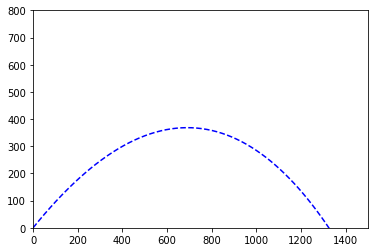

In [14]:
n_steps = 1000
thetas = range(5, 90, 5) # the angles in degrees

initial_conditions = [0, 0, 88.38834764831843, 88.38834764831843]    
values_euler = solve_euler(initial_conditions, 300, n_steps)
xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
plt.plot(xs_euler, ys_euler, color='blue', linestyle='--')
plt.xlim(0,1500)
plt.ylim(0,800);

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [103]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here
